**Importer les packages necessaires**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

**Afficher les premières lignes**

In [2]:
df = pd.read_csv('NBA_Shot_Locations_1997to2020.csv')

In [3]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729512 entries, 0 to 4729511
Data columns (total 22 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Game ID            int64 
 1   Game Event ID      int64 
 2   Player ID          int64 
 3   Player Name        object
 4   Team ID            int64 
 5   Team Name          object
 6   Period             int64 
 7   Minutes Remaining  int64 
 8   Seconds Remaining  int64 
 9   Action Type        object
 10  Shot Type          object
 11  Shot Zone Basic    object
 12  Shot Zone Area     object
 13  Shot Zone Range    object
 14  Shot Distance      int64 
 15  X Location         int64 
 16  Y Location         int64 
 17  Shot Made Flag     int64 
 18  Game Date          int64 
 19  Home Team          object
 20  Away Team          object
 21  Season Type        object
dtypes: int64(12), object(10)
memory usage: 793.8+ MB


**Selectionner les 20 meilleurs joueurs et seulement les années de 2000 à 2020**

In [5]:
df['Game Date'] = df['Game Date'].astype(str)
df['Year'] = df['Game Date'].str[:4].astype(int)
df_2000to2020 = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

top_20_players = ["Kobe Bryant", "LeBron James", "Stephen Curry", "Kevin Durant", "Dwyane Wade", "Dirk Nowitzki", "Tim Duncan", "Shaquille O'Neal", "Steve Nash", "Kawhi Leonard", "James Harden", "Jason Kidd", "Allen Iverson", "Chris Webber", "Kevin Garnett", "Paul Pierce", "Giannis Antetokounmpo", "Jimmy Butler", "Russell Westbrook", "Dwight Howard"]
df_top_20_players_2000to2020 = df_2000to2020[df_2000to2020['Player Name'].isin(top_20_players)]

In [6]:
df_top_20_players_2000to2020.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type,Year
318734,29900436,2,1495,Tim Duncan,1610612759,San Antonio Spurs,1,11,41,Jump Shot,...,8-16 ft.,13,-113,68,0,20000104,MIN,SAS,Regular Season,2000
318735,29900436,29,1495,Tim Duncan,1610612759,San Antonio Spurs,1,7,53,Jump Shot,...,8-16 ft.,13,123,51,1,20000104,MIN,SAS,Regular Season,2000
318736,29900436,56,1495,Tim Duncan,1610612759,San Antonio Spurs,1,4,33,Layup Shot,...,Less Than 8 ft.,0,0,0,1,20000104,MIN,SAS,Regular Season,2000
318737,29900436,96,1495,Tim Duncan,1610612759,San Antonio Spurs,1,1,17,Jump Shot,...,16-24 ft.,16,102,130,0,20000104,MIN,SAS,Regular Season,2000
318738,29900436,101,1495,Tim Duncan,1610612759,San Antonio Spurs,1,0,33,Jump Shot,...,Less Than 8 ft.,7,59,51,1,20000104,MIN,SAS,Regular Season,2000


In [7]:
df_top_20_players_2000to2020.columns

Index(['Game ID', 'Game Event ID', 'Player ID', 'Player Name', 'Team ID',
       'Team Name', 'Period', 'Minutes Remaining', 'Seconds Remaining',
       'Action Type', 'Shot Type', 'Shot Zone Basic', 'Shot Zone Area',
       'Shot Zone Range', 'Shot Distance', 'X Location', 'Y Location',
       'Shot Made Flag', 'Game Date', 'Home Team', 'Away Team', 'Season Type',
       'Year'],
      dtype='object')

In [8]:
df_top_20_players_2000to2020['Player Name'].unique()

array(['Tim Duncan', 'Dirk Nowitzki', 'Paul Pierce', 'Chris Webber',
       "Shaquille O'Neal", 'Jason Kidd', 'Kevin Garnett', 'Allen Iverson',
       'Steve Nash', 'Kobe Bryant', 'LeBron James', 'Dwyane Wade',
       'Dwight Howard', 'Kevin Durant', 'Russell Westbrook',
       'James Harden', 'Stephen Curry', 'Kawhi Leonard', 'Jimmy Butler',
       'Giannis Antetokounmpo'], dtype=object)

In [9]:
df_top_20_players_2000to2020['Player Name'].nunique()

20

In [10]:
df_top_20_players_2000to2020['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [11]:
df_top_20_players_2000to2020['Year'].nunique()

21

**Etude de corrélation entre toutes les colonnes après encoder les variables catégorielles**

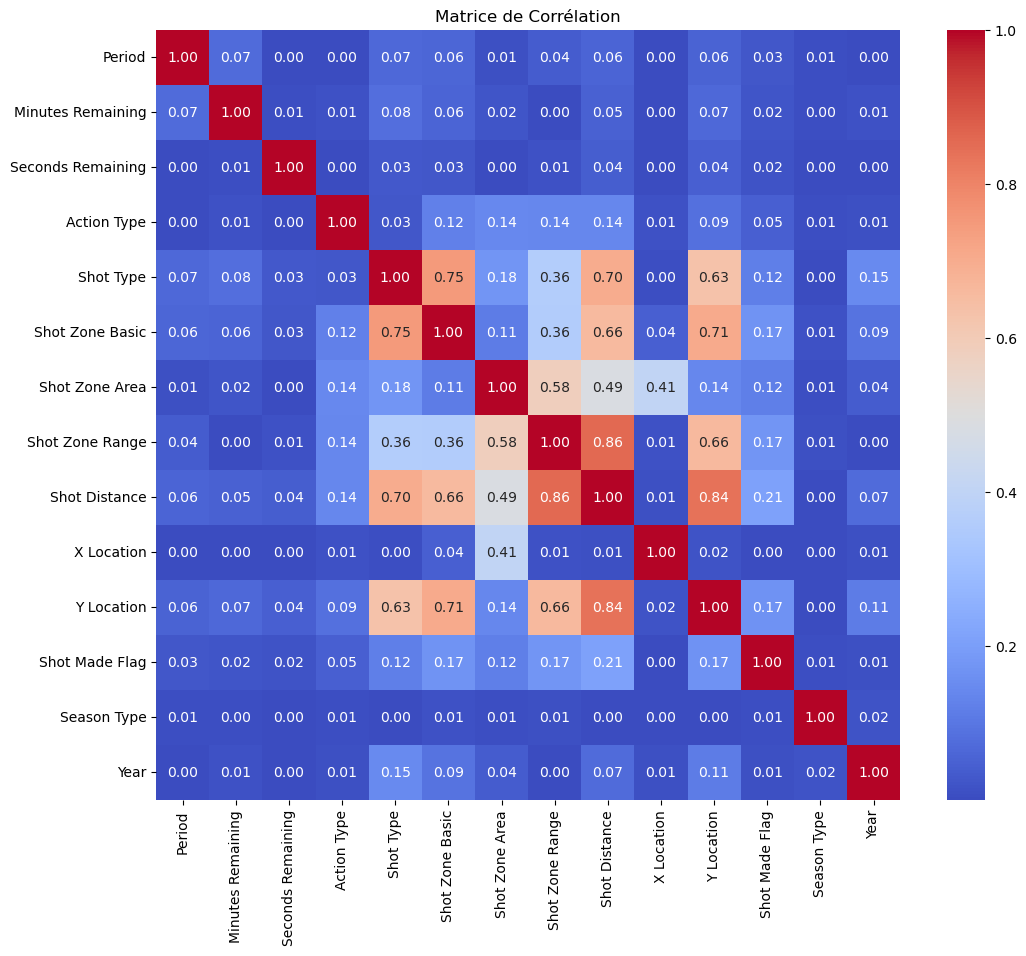

Colonnes les plus corrélées avec 'Shot Made Flag' :
Shot Made Flag       1.000000
Shot Distance        0.210635
Shot Zone Range      0.174605
Shot Zone Basic      0.170851
Y Location           0.167782
Shot Zone Area       0.120230
Shot Type            0.118106
Action Type          0.047271
Period               0.027611
Minutes Remaining    0.022236
Seconds Remaining    0.017527
Year                 0.009066
Season Type          0.006959
X Location           0.003813
Name: Shot Made Flag, dtype: float64


In [12]:
# Suppression des colonnes spécifiées
columns_to_drop = ['Game ID', 'Game Event ID', 'Player ID', 'Player Name', 'Team ID', 'Team Name', 'Game Date', 'Home Team', 'Away Team']
df_reduced = df_top_20_players_2000to2020.drop(columns=columns_to_drop)

# Encodage des variables catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Action Type', 'Shot Type', 'Shot Zone Basic', 'Shot Zone Area', 'Shot Zone Range', 'Season Type']

for column in categorical_columns:
    df_reduced[column] = label_encoder.fit_transform(df_reduced[column])

# Étude de la corrélation en valeur absolue
correlation_matrix = df_reduced.corr().abs()

# Afficher la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matrice de Corrélation')
plt.show()

# Imprimer les colonnes les plus corrélées avec la variable cible 'Shot Made Flag'
target_correlation = correlation_matrix['Shot Made Flag'].sort_values(ascending=False)
print("Colonnes les plus corrélées avec 'Shot Made Flag' :")
print(target_correlation)

In [13]:
# Avant la fusion
columns_to_drop = ['Game Date', 'Action Type', 'Shot Type','Minutes Remaining', 'Seconds Remaining']
# 'Game Date' supprimé après ajouter la colonne Year 
# 'Action Type' : catégorisée/encodée dans le tableau Play-by-play 
# 'Shot Type': catégorisation fait dans le tableau Play-by-Play
# 'Minutes Remaining','Seconds Remaining': les 2 colonnes existent dans le tableau play-by-play
# les autres colonnes ont été gardé pour la fusion avec les autres data frame

df_filtered_toMerge = df_top_20_players_2000to2020.drop(columns_to_drop, axis=1)

In [14]:
df_filtered_toMerge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334331 entries, 318734 to 4727908
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Game ID          334331 non-null  int64 
 1   Game Event ID    334331 non-null  int64 
 2   Player ID        334331 non-null  int64 
 3   Player Name      334331 non-null  object
 4   Team ID          334331 non-null  int64 
 5   Team Name        334331 non-null  object
 6   Period           334331 non-null  int64 
 7   Shot Zone Basic  334331 non-null  object
 8   Shot Zone Area   334331 non-null  object
 9   Shot Zone Range  334331 non-null  object
 10  Shot Distance    334331 non-null  int64 
 11  X Location       334331 non-null  int64 
 12  Y Location       334331 non-null  int64 
 13  Shot Made Flag   334331 non-null  int64 
 14  Home Team        334331 non-null  object
 15  Away Team        334331 non-null  object
 16  Season Type      334331 non-null  object
 17  Year     

In [15]:
df_filtered_toMerge.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Shot Zone Basic,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Home Team,Away Team,Season Type,Year
318734,29900436,2,1495,Tim Duncan,1610612759,San Antonio Spurs,1,Mid-Range,Left Side(L),8-16 ft.,13,-113,68,0,MIN,SAS,Regular Season,2000
318735,29900436,29,1495,Tim Duncan,1610612759,San Antonio Spurs,1,Mid-Range,Right Side(R),8-16 ft.,13,123,51,1,MIN,SAS,Regular Season,2000
318736,29900436,56,1495,Tim Duncan,1610612759,San Antonio Spurs,1,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,MIN,SAS,Regular Season,2000
318737,29900436,96,1495,Tim Duncan,1610612759,San Antonio Spurs,1,Mid-Range,Right Side Center(RC),16-24 ft.,16,102,130,0,MIN,SAS,Regular Season,2000
318738,29900436,101,1495,Tim Duncan,1610612759,San Antonio Spurs,1,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,59,51,1,MIN,SAS,Regular Season,2000


In [16]:
columns_to_encode = ['Shot Zone Basic', 'Shot Zone Area','Shot Zone Range']

In [17]:
df_filtered_toMerge = pd.get_dummies(df_filtered_toMerge, columns=columns_to_encode)

In [18]:
df_filtered_toMerge['Season Type'] = df_filtered_toMerge['Season Type'].replace({'Regular Season': 0, 'Playoffs': 1}).astype(int)

C:\Users\a740407\AppData\Local\Temp\ipykernel_30124\499288228.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered_toMerge['Season Type'] = df_filtered_toMerge['Season Type'].replace({'Regular Season': 0, 'Playoffs': 1}).astype(int)


In [19]:
df_filtered_toMerge.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Shot Distance,X Location,Y Location,...,Shot Zone Area_Center(C),Shot Zone Area_Left Side Center(LC),Shot Zone Area_Left Side(L),Shot Zone Area_Right Side Center(RC),Shot Zone Area_Right Side(R),Shot Zone Range_16-24 ft.,Shot Zone Range_24+ ft.,Shot Zone Range_8-16 ft.,Shot Zone Range_Back Court Shot,Shot Zone Range_Less Than 8 ft.
318734,29900436,2,1495,Tim Duncan,1610612759,San Antonio Spurs,1,13,-113,68,...,False,False,True,False,False,False,False,True,False,False
318735,29900436,29,1495,Tim Duncan,1610612759,San Antonio Spurs,1,13,123,51,...,False,False,False,False,True,False,False,True,False,False
318736,29900436,56,1495,Tim Duncan,1610612759,San Antonio Spurs,1,0,0,0,...,True,False,False,False,False,False,False,False,False,True
318737,29900436,96,1495,Tim Duncan,1610612759,San Antonio Spurs,1,16,102,130,...,False,False,False,True,False,True,False,False,False,False
318738,29900436,101,1495,Tim Duncan,1610612759,San Antonio Spurs,1,7,59,51,...,True,False,False,False,False,False,False,False,False,True


In [20]:
df_filtered_toMerge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334331 entries, 318734 to 4727908
Data columns (total 33 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Game ID                                334331 non-null  int64 
 1   Game Event ID                          334331 non-null  int64 
 2   Player ID                              334331 non-null  int64 
 3   Player Name                            334331 non-null  object
 4   Team ID                                334331 non-null  int64 
 5   Team Name                              334331 non-null  object
 6   Period                                 334331 non-null  int64 
 7   Shot Distance                          334331 non-null  int64 
 8   X Location                             334331 non-null  int64 
 9   Y Location                             334331 non-null  int64 
 10  Shot Made Flag                         334331 non-null  int64 
 11 

In [21]:
df_filtered_toMerge.columns

Index(['Game ID', 'Game Event ID', 'Player ID', 'Player Name', 'Team ID',
       'Team Name', 'Period', 'Shot Distance', 'X Location', 'Y Location',
       'Shot Made Flag', 'Home Team', 'Away Team', 'Season Type', 'Year',
       'Shot Zone Basic_Above the Break 3', 'Shot Zone Basic_Backcourt',
       'Shot Zone Basic_In The Paint (Non-RA)',
       'Shot Zone Basic_Left Corner 3', 'Shot Zone Basic_Mid-Range',
       'Shot Zone Basic_Restricted Area', 'Shot Zone Basic_Right Corner 3',
       'Shot Zone Area_Back Court(BC)', 'Shot Zone Area_Center(C)',
       'Shot Zone Area_Left Side Center(LC)', 'Shot Zone Area_Left Side(L)',
       'Shot Zone Area_Right Side Center(RC)', 'Shot Zone Area_Right Side(R)',
       'Shot Zone Range_16-24 ft.', 'Shot Zone Range_24+ ft.',
       'Shot Zone Range_8-16 ft.', 'Shot Zone Range_Back Court Shot',
       'Shot Zone Range_Less Than 8 ft.'],
      dtype='object')

In [22]:
df_filtered_toMerge['Season Type'].value_counts()

Season Type
0    290054
1     44277
Name: count, dtype: int64

In [23]:
df_filtered_toMerge['Season Type'].value_counts(normalize=True)

Season Type
0    0.867565
1    0.132435
Name: proportion, dtype: float64

In [24]:
df_filtered_toMerge.to_csv('Shot_Locations_top_20_players_2000to2020_Encoded.csv', index=False)

In [25]:
#df_filtered_toMerge_sansEncodage = df_top_20_players.drop(columns_to_drop, axis=1)

In [26]:
#df_filtered_toMerge_sansEncodage.info()

In [27]:
#df_filtered_toMerge_sansEncodage.to_csv('Shot_Locations_top_20_players_2000to2020_sansEncodage.csv', index=False)

**Distribution des variables les plus corrélées avec la variable cible 'Shot Made Flag'**

In [28]:
# Liste des colonnes à tracer
columns_to_plot = ['Shot Distance', 'Shot Zone Range', 'Shot Zone Basic', 'Y Location', 'Shot Zone Area', 'Shot Type', 'X Location', 'Period', 'Minutes Remaining', 'Seconds Remaining', 'Year', 'Season Type']
len(columns_to_plot)

12

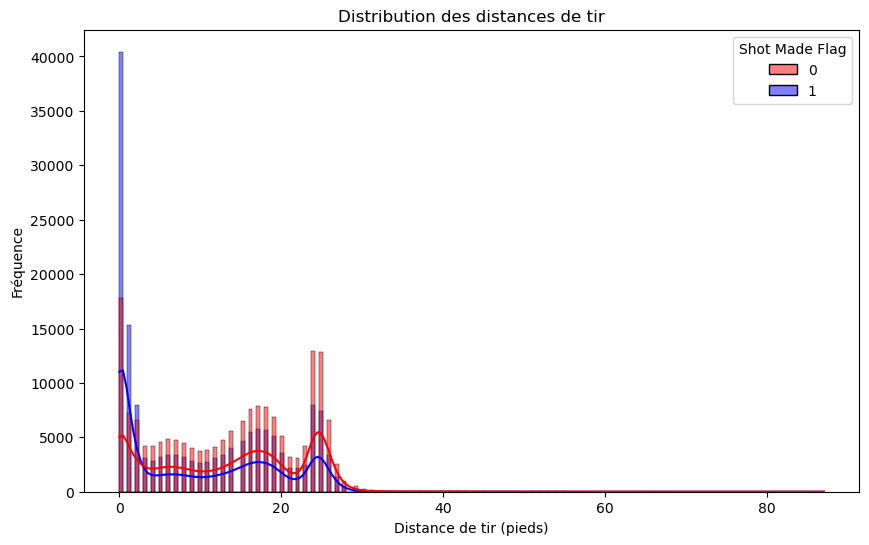

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_top_20_players_2000to2020, x='Shot Distance', bins=180, kde=True, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title('Distribution des distances de tir')
plt.xlabel('Distance de tir (pieds)')
plt.ylabel('Fréquence')
plt.show()


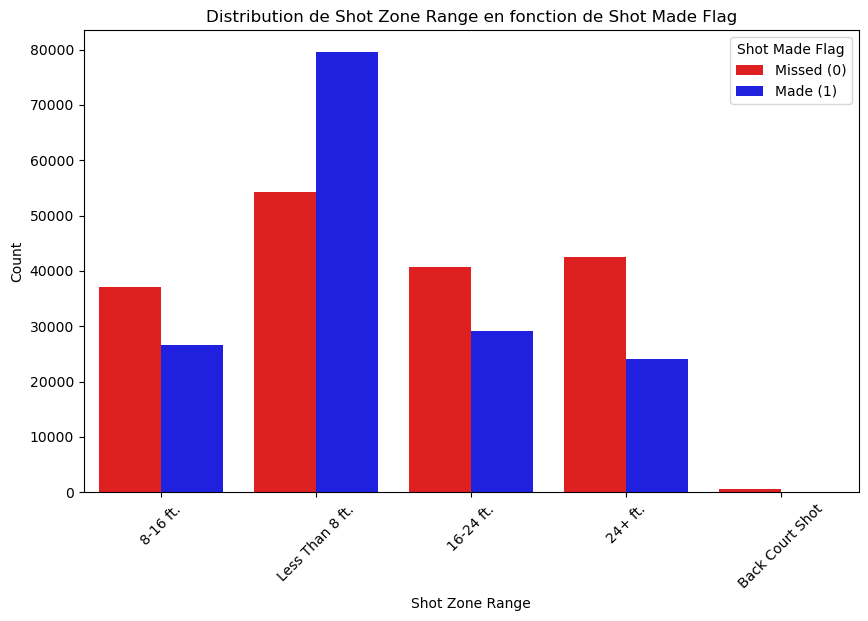

In [30]:
column = columns_to_plot[1]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players_2000to2020, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

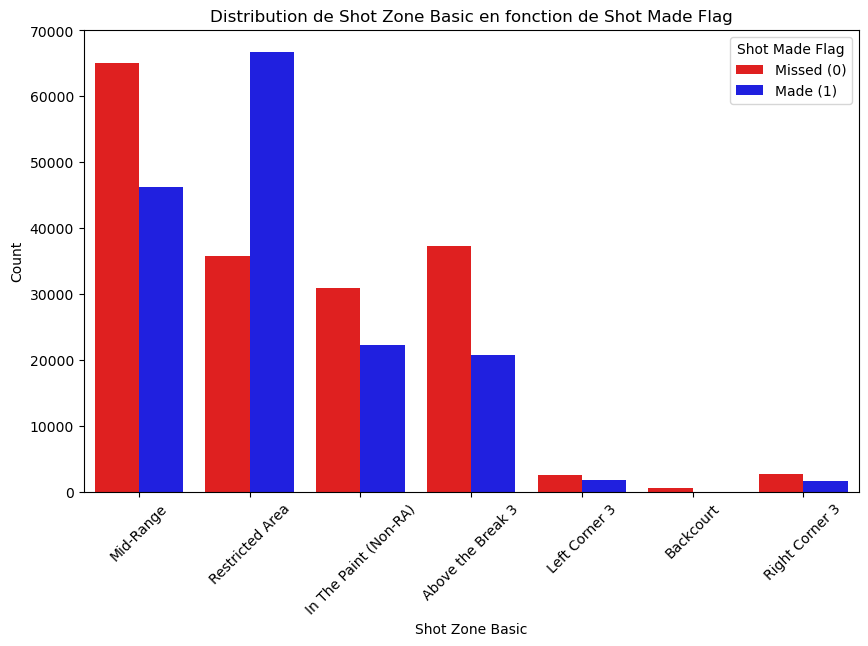

In [31]:
column = columns_to_plot[2]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players_2000to2020, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

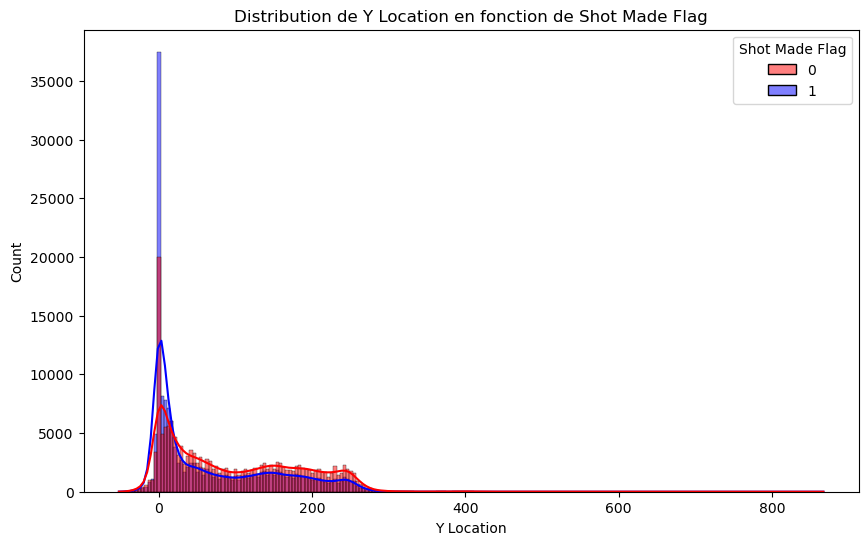

In [32]:
column = columns_to_plot[3]
plt.figure(figsize=(10, 6))
sns.histplot(data=df_top_20_players_2000to2020, x=column, hue='Shot Made Flag', kde=True, palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
#plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.show()

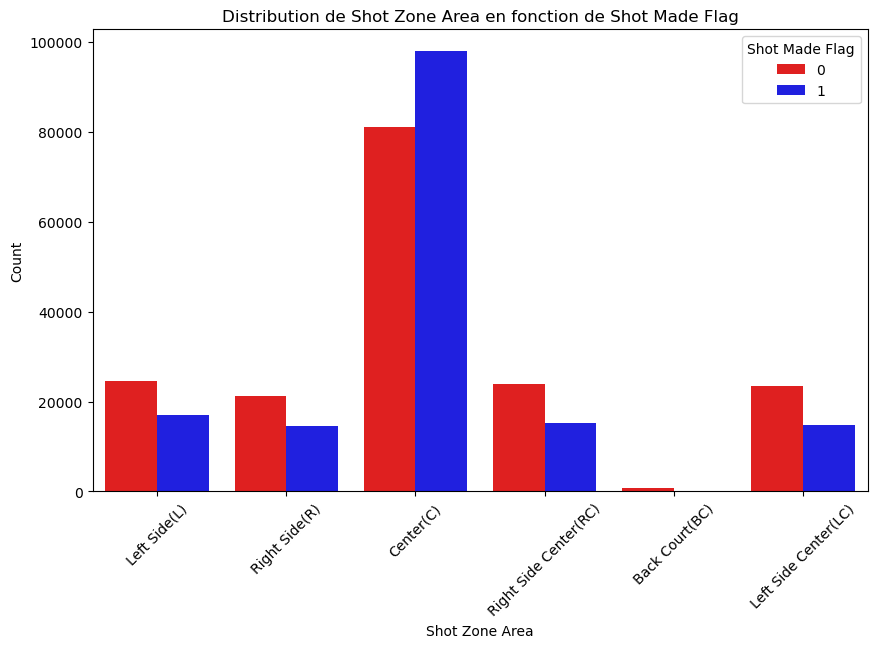

In [33]:
column = columns_to_plot[4]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players_2000to2020, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
#plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

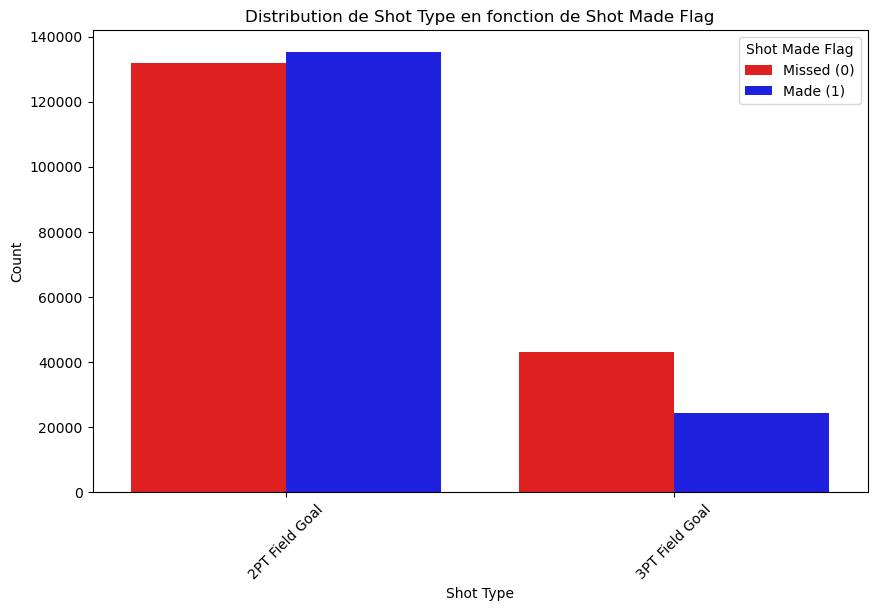

In [34]:
column = columns_to_plot[5]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players_2000to2020, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

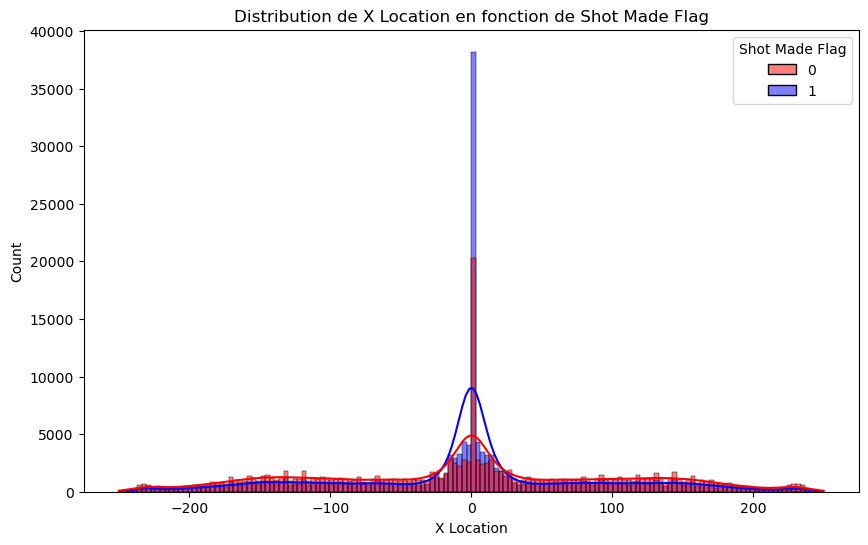

In [35]:
column = columns_to_plot[6]
plt.figure(figsize=(10, 6))
sns.histplot(data=df_top_20_players_2000to2020, x=column, hue='Shot Made Flag', kde=True, palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
#plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.show()

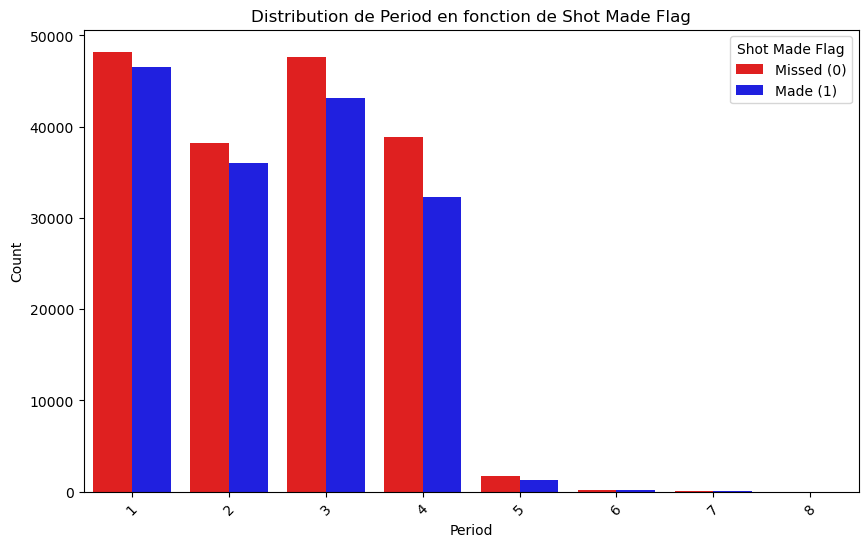

In [36]:
column = columns_to_plot[7]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players_2000to2020, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

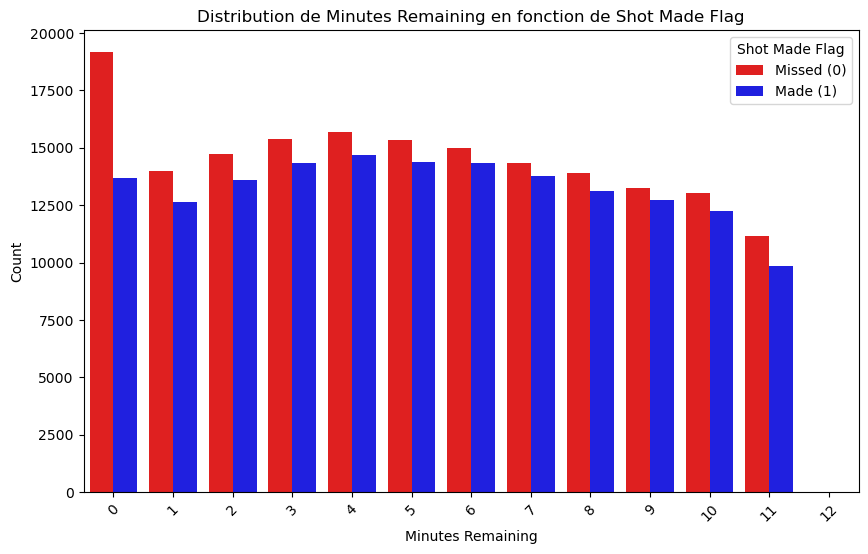

In [37]:
column = columns_to_plot[8]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players_2000to2020, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

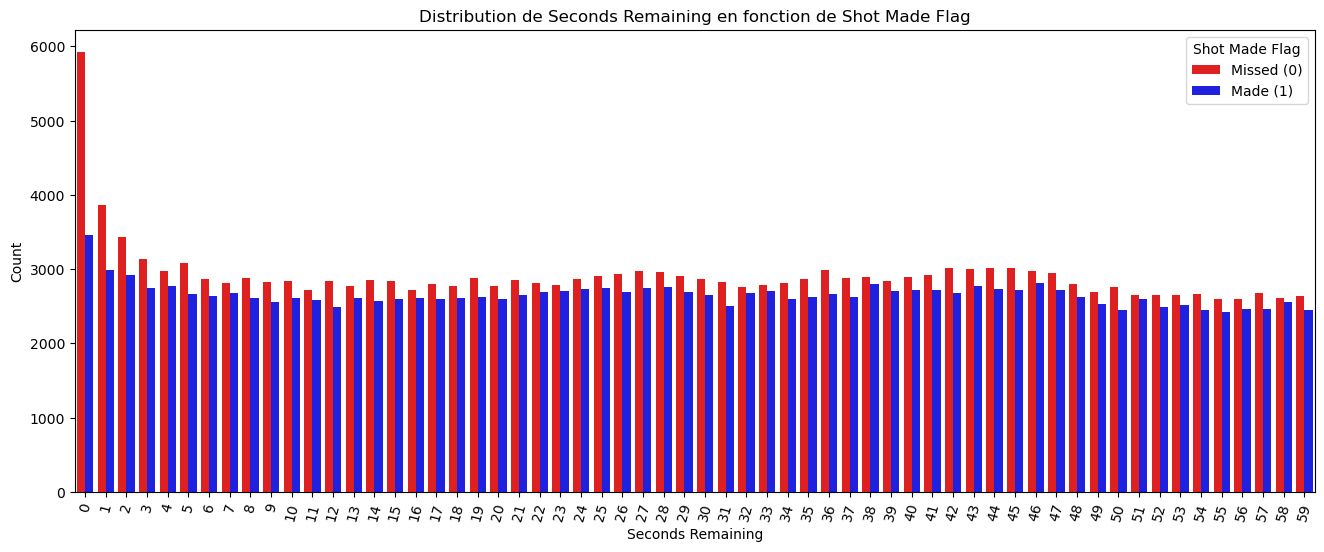

In [44]:
column = columns_to_plot[9]
plt.figure(figsize=(16, 6))
sns.countplot(data=df_top_20_players_2000to2020, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=75)  
plt.show()

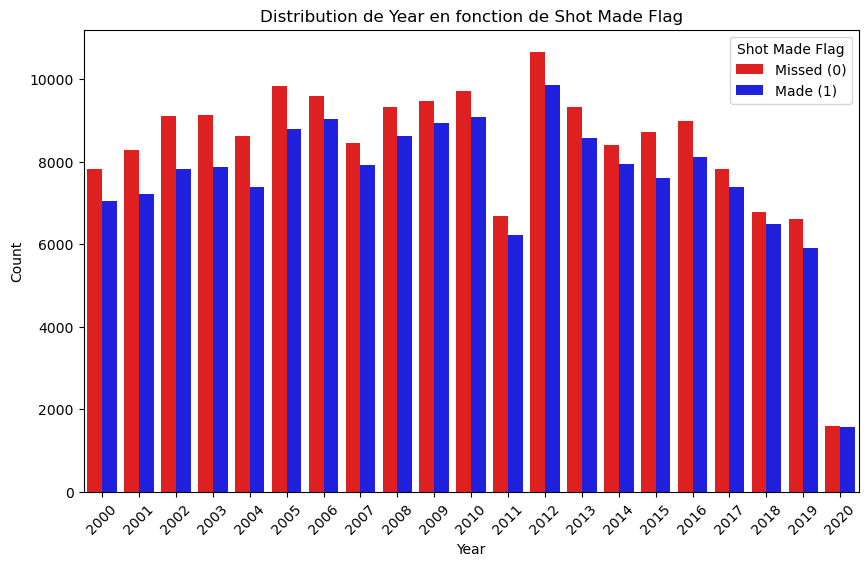

In [39]:
column = columns_to_plot[10]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players_2000to2020, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

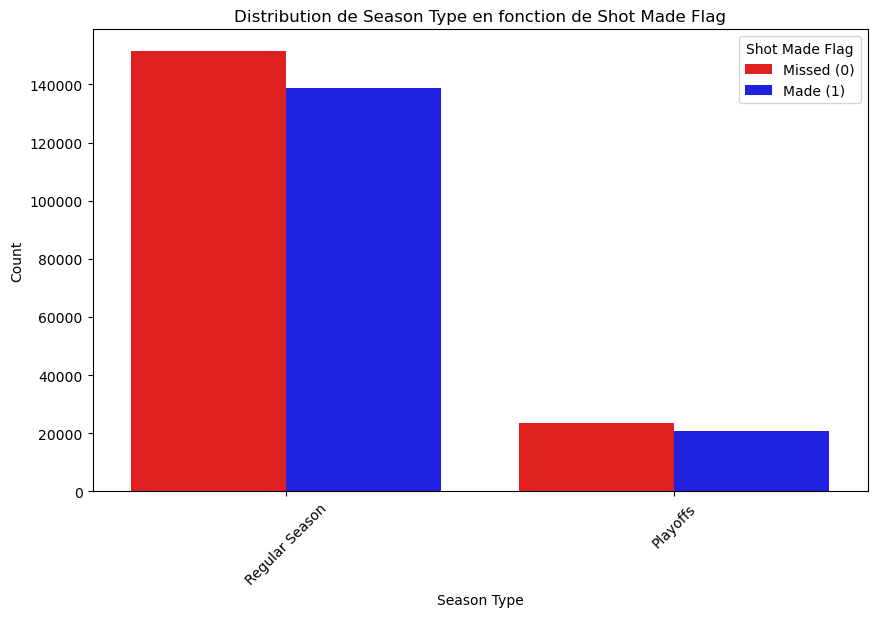

In [40]:
column = columns_to_plot[11]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players_2000to2020, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

**----------------------------------------------------------- Extra Extra Extra Extra Extra Extra -----------------------------------------------------------**

**Etude de correlation détaillée**

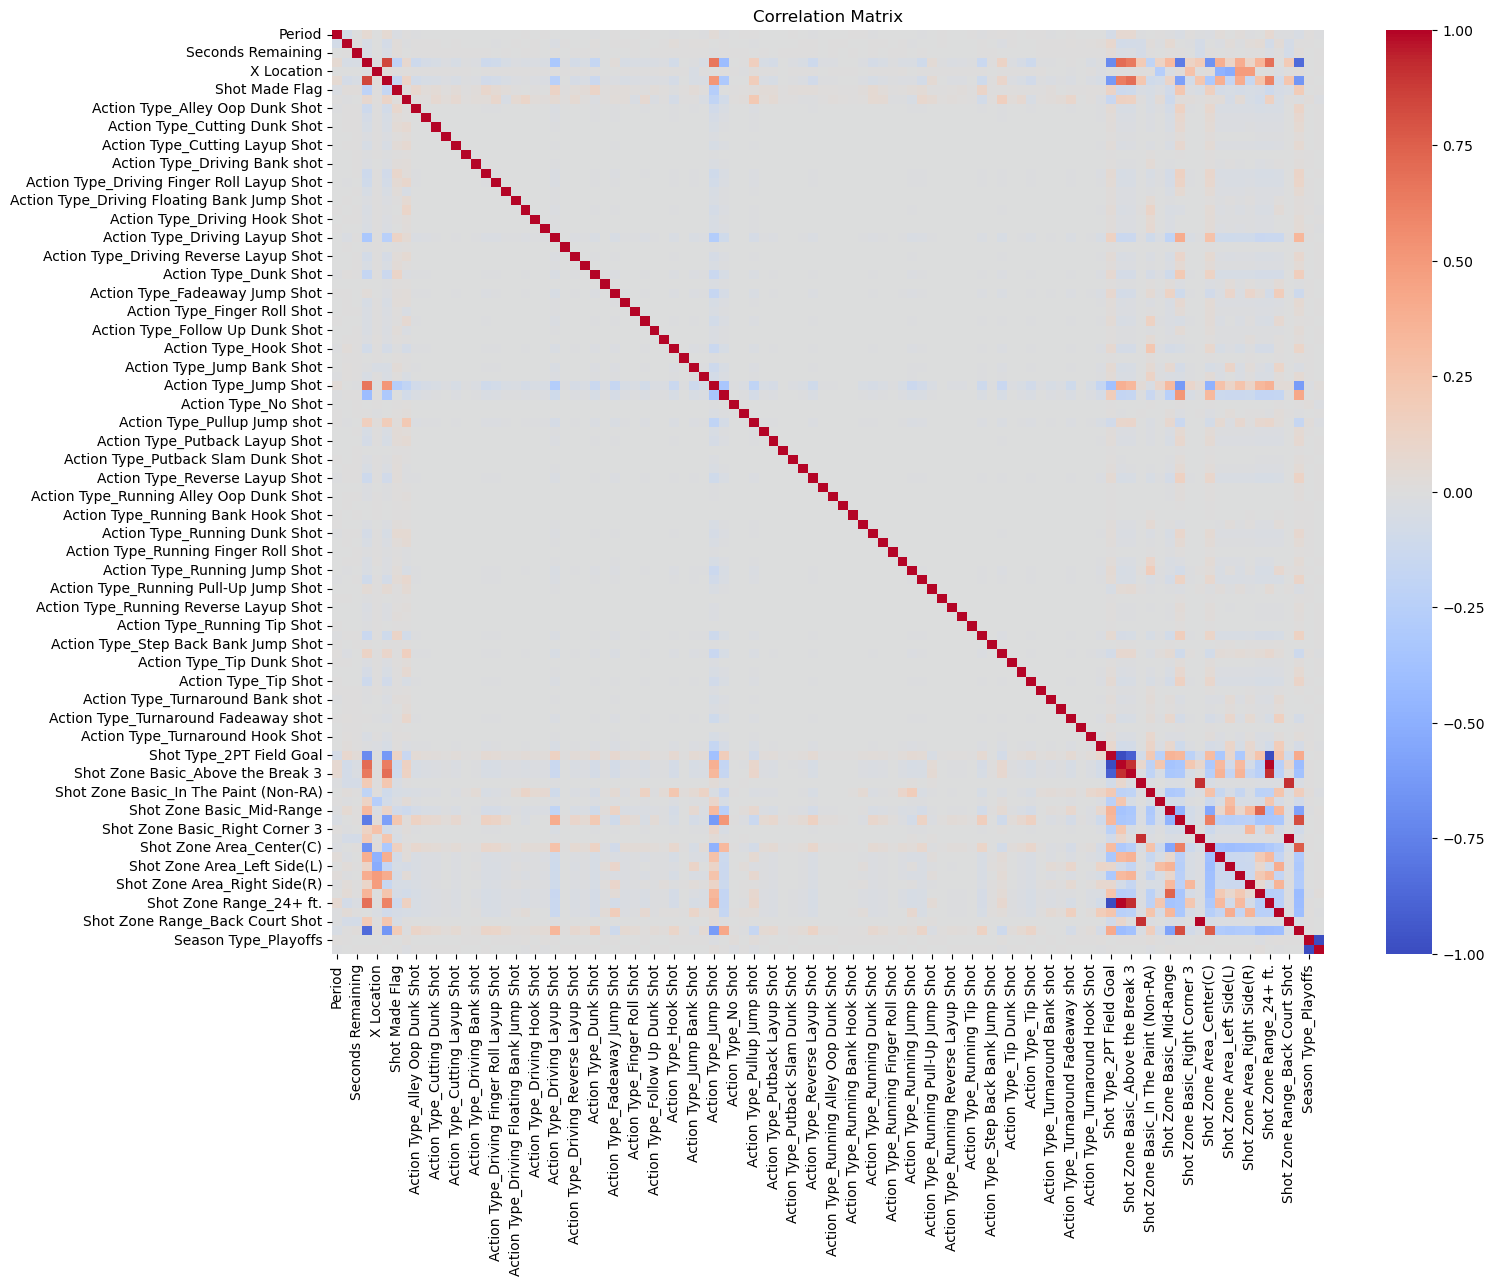

(Shot Zone Basic_Restricted Area    0.231688
 Shot Zone Range_Less Than 8 ft.    0.192520
 Shot Zone Area_Center(C)           0.150223
 Action Type_Driving Layup Shot     0.120407
 Shot Type_2PT Field Goal           0.118106
                                      ...   
 Shot Zone Range_24+ ft.           -0.113966
 Shot Type_3PT Field Goal          -0.118106
 Y Location                        -0.167782
 Shot Distance                     -0.210635
 Action Type_Jump Shot             -0.260647
 Name: Shot Made Flag, Length: 99, dtype: float64,
 ['Shot Zone Basic_Restricted Area',
  'Shot Zone Range_Less Than 8 ft.',
  'Shot Zone Area_Center(C)',
  'Action Type_Driving Layup Shot',
  'Shot Type_2PT Field Goal'])

In [41]:
# 1) Drop the specified columns
columns_to_drop = ['Game ID', 'Game Event ID', 'Player ID', 'Player Name', 'Team ID', 'Team Name', 'Game Date', 'Home Team', 'Away Team']
df_top_20_players_2000to2020_tmp = df_top_20_players_2000to2020.drop(columns=columns_to_drop)

# 2) Encode categorical variables
categorical_columns = ['Action Type', 'Shot Type', 'Shot Zone Basic', 'Shot Zone Area', 'Shot Zone Range', 'Season Type']
df_top_20_players_2000to2020_encoded = pd.get_dummies(df_top_20_players_2000to2020_tmp, columns=categorical_columns)

# 3) Calculate the correlation matrix
correlation_matrix = df_top_20_players_2000to2020_encoded.corr()

# 4) Plot the correlation matrix using seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 5) Print the columns most correlated with the target variable 'Shot Made Flag'
correlation_with_target = correlation_matrix['Shot Made Flag'].drop('Shot Made Flag').sort_values(ascending=False)
most_correlated_columns = correlation_with_target.index[:5].tolist()

correlation_with_target, most_correlated_columns

In [42]:
correlation_with_target.shape

(99,)

**Etude de correlation détaillée en valeur absolue**

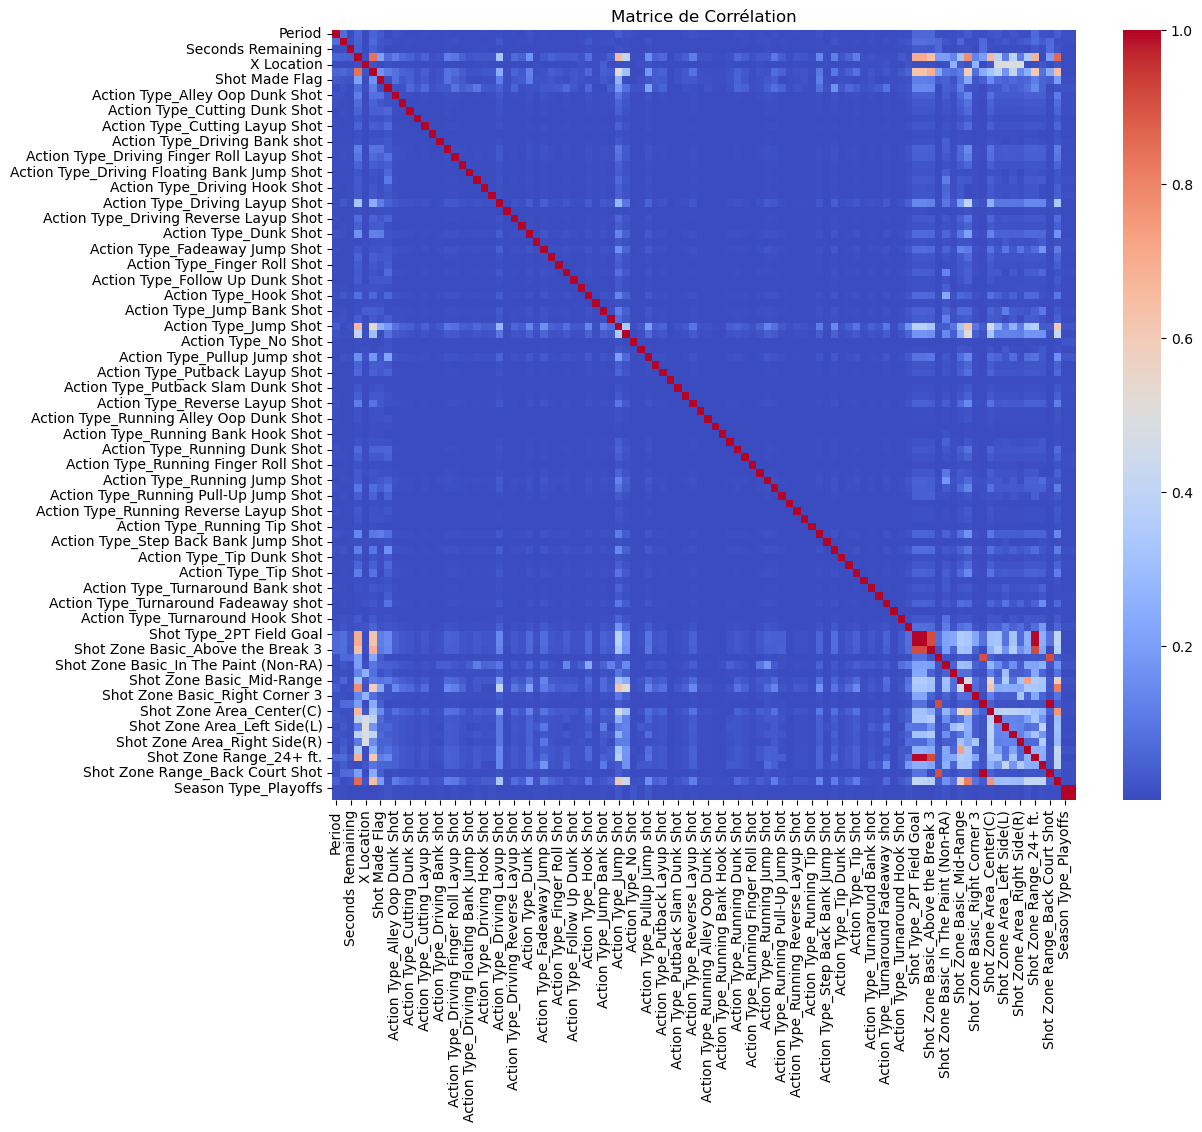

Colonnes les plus corrélées avec 'Shot Made Flag' :
Shot Made Flag                                    1.000000
Action Type_Jump Shot                             0.260647
Shot Zone Basic_Restricted Area                   0.231688
Shot Distance                                     0.210635
Shot Zone Range_Less Than 8 ft.                   0.192520
                                                    ...   
Action Type_No Shot                               0.000763
Action Type_Running Pull-Up Jump Shot             0.000409
Action Type_Step Back Jump shot                   0.000280
Action Type_Driving Floating Jump Shot            0.000188
Action Type_Turnaround Fadeaway Bank Jump Shot    0.000148
Name: Shot Made Flag, Length: 100, dtype: float64


In [43]:
columns_to_drop = ['Game ID', 'Game Event ID', 'Player ID', 'Player Name', 'Team ID', 'Team Name', 'Game Date', 'Home Team', 'Away Team']
df_reduced = df_top_20_players_2000to2020.drop(columns=columns_to_drop)

categorical_columns = ['Action Type', 'Shot Type', 'Shot Zone Basic', 'Shot Zone Area', 'Shot Zone Range', 'Season Type']
df_encoded = pd.get_dummies(df_reduced, columns=categorical_columns)

correlation_matrix = df_encoded.corr().abs()

# Afficher la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matrice de Corrélation')
plt.show()

# Imprimer les colonnes les plus corrélées avec la variable cible 'Shot Made Flag'
target_correlation = correlation_matrix['Shot Made Flag'].sort_values(ascending=False)
print("Colonnes les plus corrélées avec 'Shot Made Flag' :")
print(target_correlation)